In [1]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from ripser import ripser
import plotly.graph_objects as go
from src.clusterize_method import str_vector_to_list, perform_agglomerative_clustering_seaborn, \
    perform_agglomerative_clustering_dendrogram
import os

home_path = os.getcwd()
initial_data_folder = 'initial data'

initial_data_path = os.path.join(home_path, initial_data_folder)
df = pd.read_excel(f'{initial_data_path}/terms_with_vectors.xlsx')
df = str_vector_to_list(df)
X = np.array(df["vector"].tolist())

distance_matrix = pairwise_distances(X)

result = ripser(distance_matrix)


diagrams = result['dgms']
fig = go.Figure()

for i, dgm in enumerate(diagrams):
    if len(dgm) > 0:
        x = [point[0] for point in dgm]
        y = [point[1] if np.isfinite(point[1]) else max(x) for point in dgm]
        fig.add_trace(go.Scatter(x=x, y=y, mode='markers', name=f'Diagram {i}'))

fig.update_layout(title='Persistence Diagram')
fig.show()
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(result['dgms'])

df["cluster"] = clusters


100%|██████████| 85/85 [00:00<00:00, 19730.80it/s]
/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/ripser/ripser.py:247: UserWarning: The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?
  warnings.warn(


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

In [5]:
from tqdm import tqdm
import pandas as pd
import numpy as np
from sklearn.metrics import pairwise_distances
from ripser import ripser
from scipy.signal import find_peaks


df = pd.read_excel(f'{initial_data_path}/terms_with_vectors.xlsx')
df = str_vector_to_list(df)
X = np.array(df["vector"].tolist())

distance_matrix = pairwise_distances(X)

result = ripser(distance_matrix)

diagram = result['dgms'][1]

interval_lengths = np.array([point[1] - point[0] for point in diagram])

peaks, _ = find_peaks(interval_lengths, height=0.1)
num_clusters = len(peaks)

print(f"Рекомендованное количество кластеров: {num_clusters}")

100%|██████████| 85/85 [00:00<00:00, 22998.05it/s]

Рекомендованное количество кластеров: 7



/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/ripser/ripser.py:247: UserWarning:

The input matrix is square, but the distance_matrix flag is off.  Did you mean to indicate that this was a distance matrix?



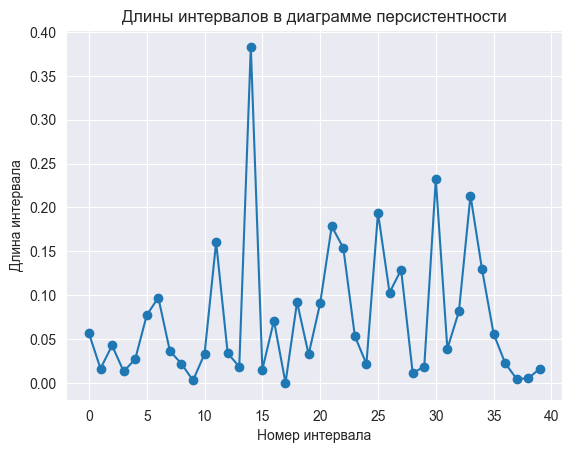

Рекомендованное количество кластеров: 7


In [2]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from scipy.signal import find_peaks


diagram = result['dgms'][1]

interval_lengths = np.array([point[1] - point[0] for point in diagram])

plt.plot(interval_lengths, marker='o')
plt.xlabel('Номер интервала')
plt.ylabel('Длина интервала')
plt.title('Длины интервалов в диаграмме персистентности')
plt.show()


peaks, _ = find_peaks(interval_lengths, height=0.1)
num_clusters = len(peaks)

print(f"Рекомендованное количество кластеров: {num_clusters}")

100%|██████████| 85/85 [00:00<00:00, 25372.99it/s]
/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



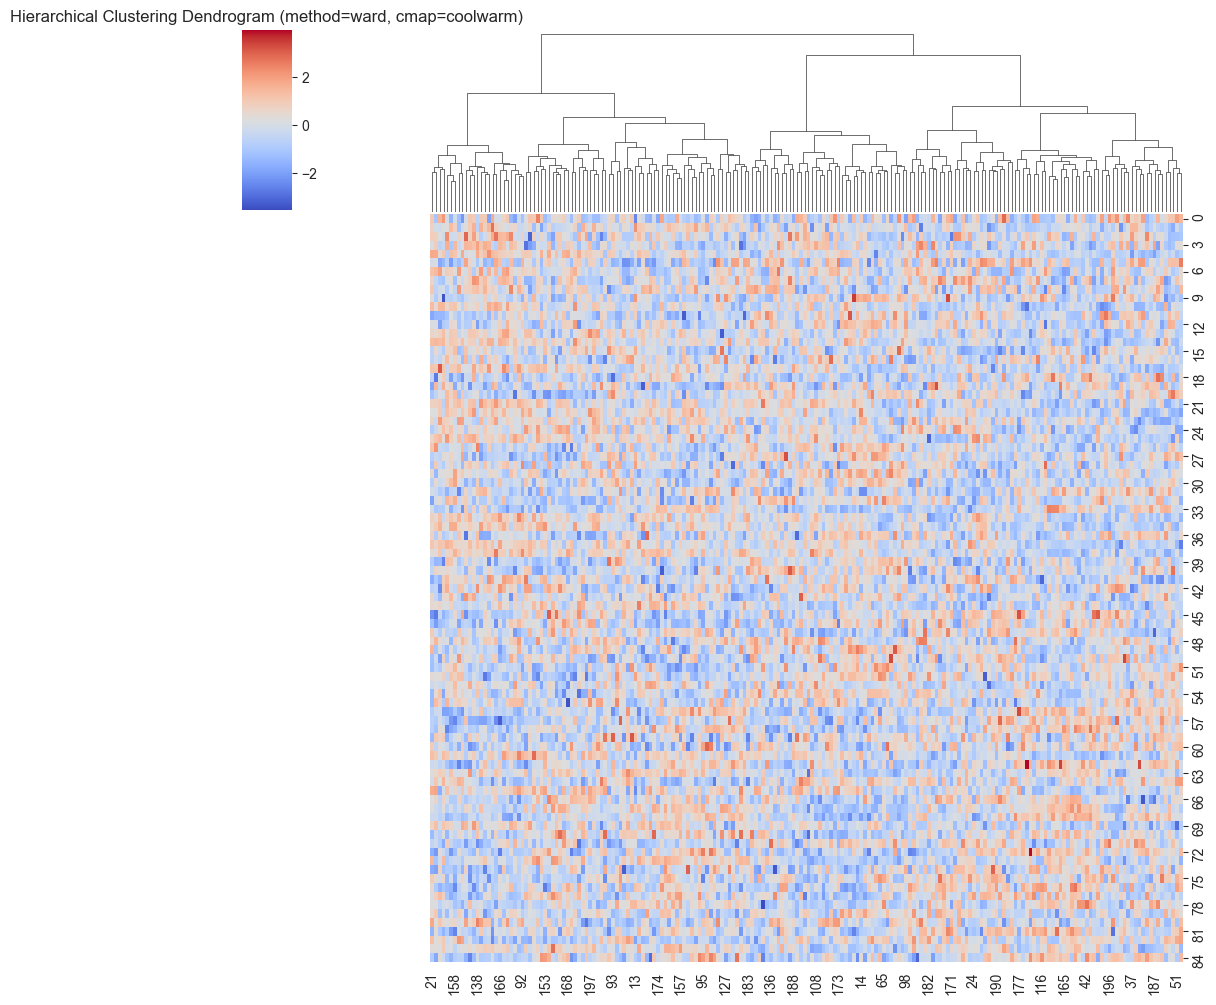

/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



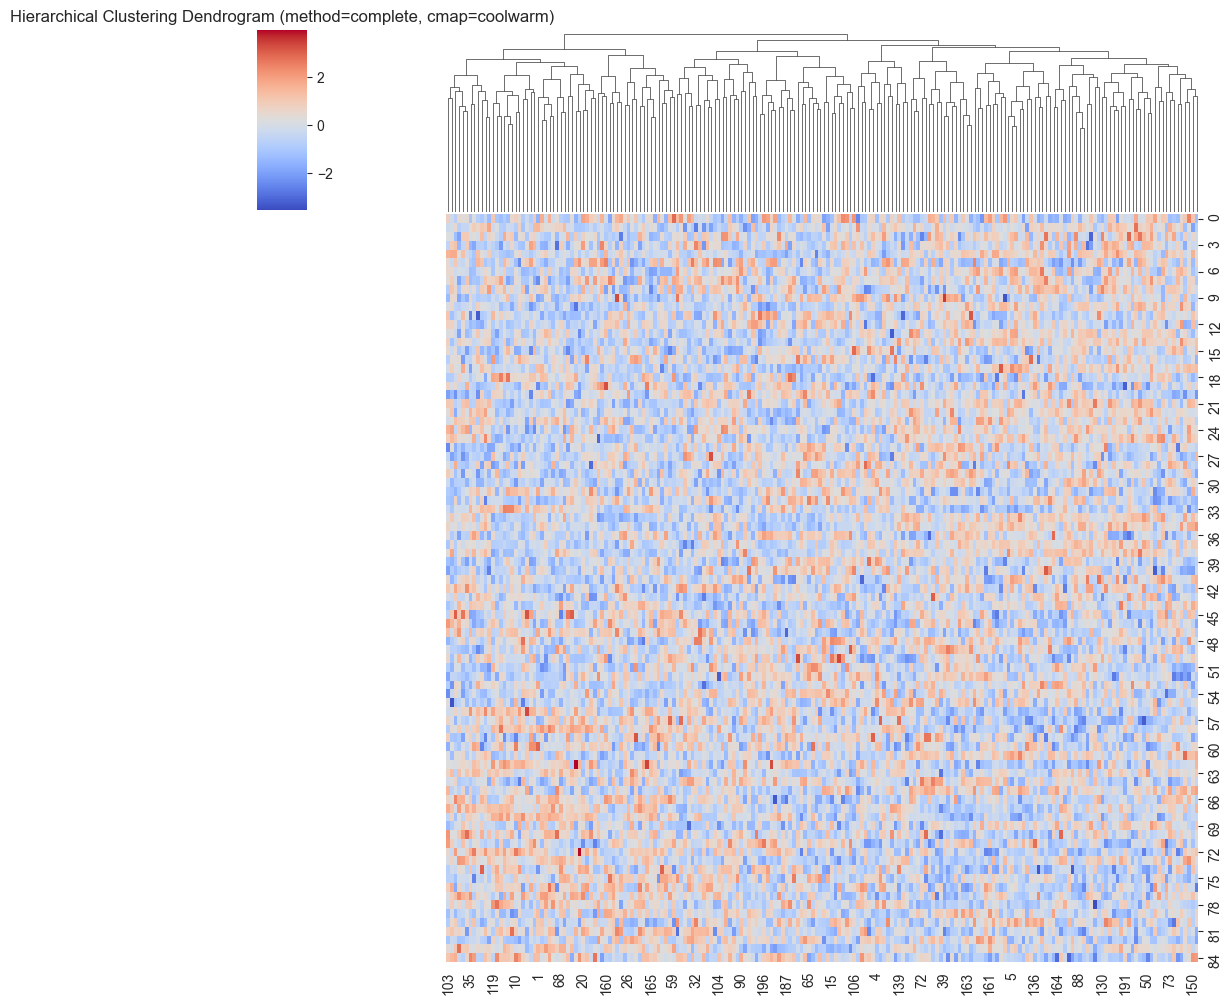

/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



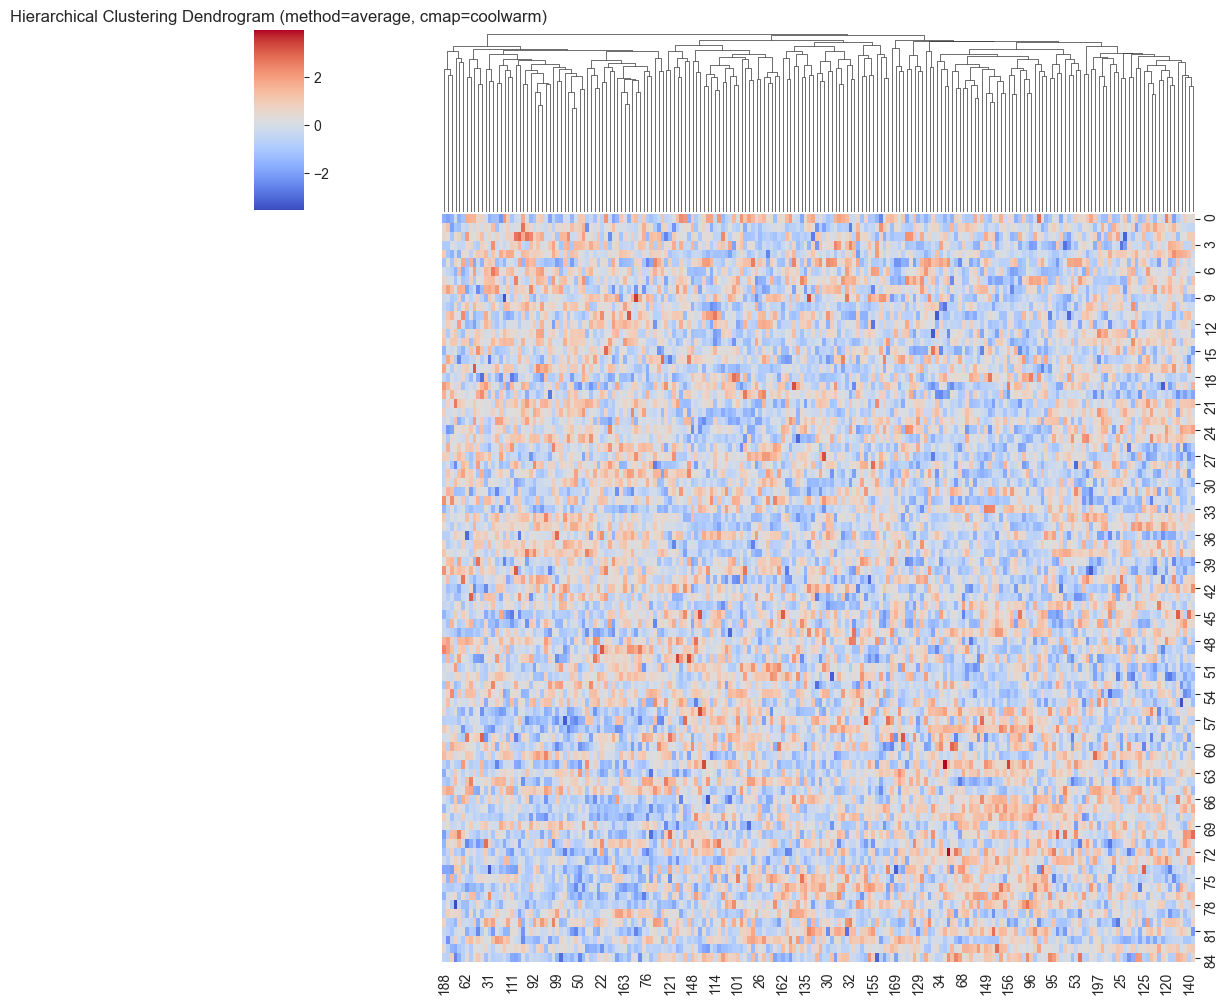

/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



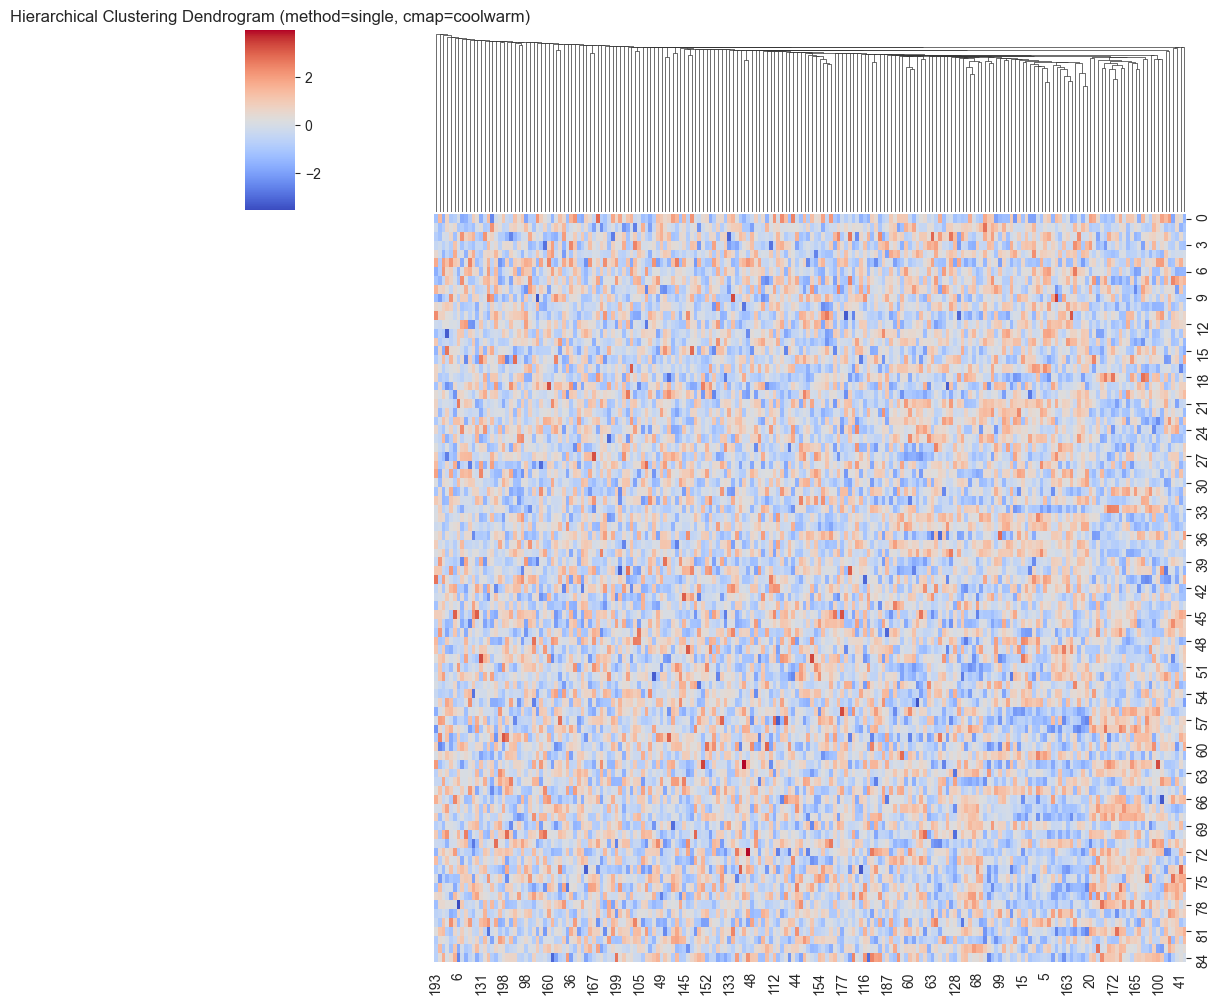

In [3]:
initial_data_path = os.path.join(home_path, initial_data_folder)
df = pd.read_excel(f'{initial_data_path}/terms_with_vectors.xlsx')
df = str_vector_to_list(df)


df_clust = perform_agglomerative_clustering_seaborn(df=df, n_clusters = 10)


In [13]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram

import matplotlib.pyplot as plt

def perform_agglomerative_clustering_dendrogram(df: pd.DataFrame,
                                                n_clusters: int = 10,
                                                affinity: str = 'euclidean',
                                                linkage_method: str = 'ward') -> pd.DataFrame:
    X = df['vector'].tolist()
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    clustering = AgglomerativeClustering(n_clusters=n_clusters,
                                         affinity=affinity,
                                         linkage=linkage_method)
    df['cluster'] = clustering.fit_predict(X_scaled)

    # Create linkage matrix and then plot the dendrogram
    linkage_matrix = np.column_stack(
        [clustering.children_, np.zeros(clustering.children_.shape[0]), np.zeros(clustering.children_.shape[0])]
    ).astype(float)

    # Plot the dendrogram
    plt.figure(figsize=(12, 6))
    plt.title("Hierarchical Clustering Dendrogram")
    dendrogram(linkage_matrix, truncate_mode="level", p=3)
    plt.xlabel("Number of points in node (or index of point if no parenthesis).")
    plt.show()

    cmap = 'coolwarm'
    metric_option = 'euclidean'
    linkage_options = ['ward', 'complete', 'average', 'single']
    for linkage_option in linkage_options:
        sns.clustermap(X_scaled, method=linkage_option, metric=metric_option, row_cluster=False, col_cluster=True,
                       cmap=cmap)
        plt.title(
            f'Hierarchical Clustering Dendrogram (method={linkage_option}, cmap={cmap})')
        plt.show()

    return df


/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/sklearn/cluster/_agglomerative.py:1006: FutureWarning:

Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead

/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/scipy/cluster/hierarchy.py:2844: UserWarning:

Attempting to set identical low and high ylims makes transformation singular; automatically expanding.



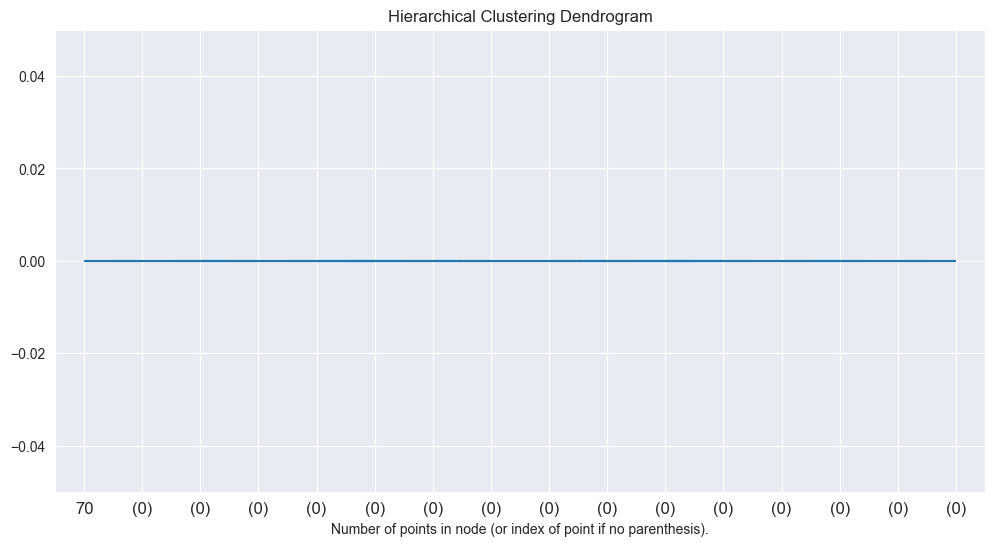

/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



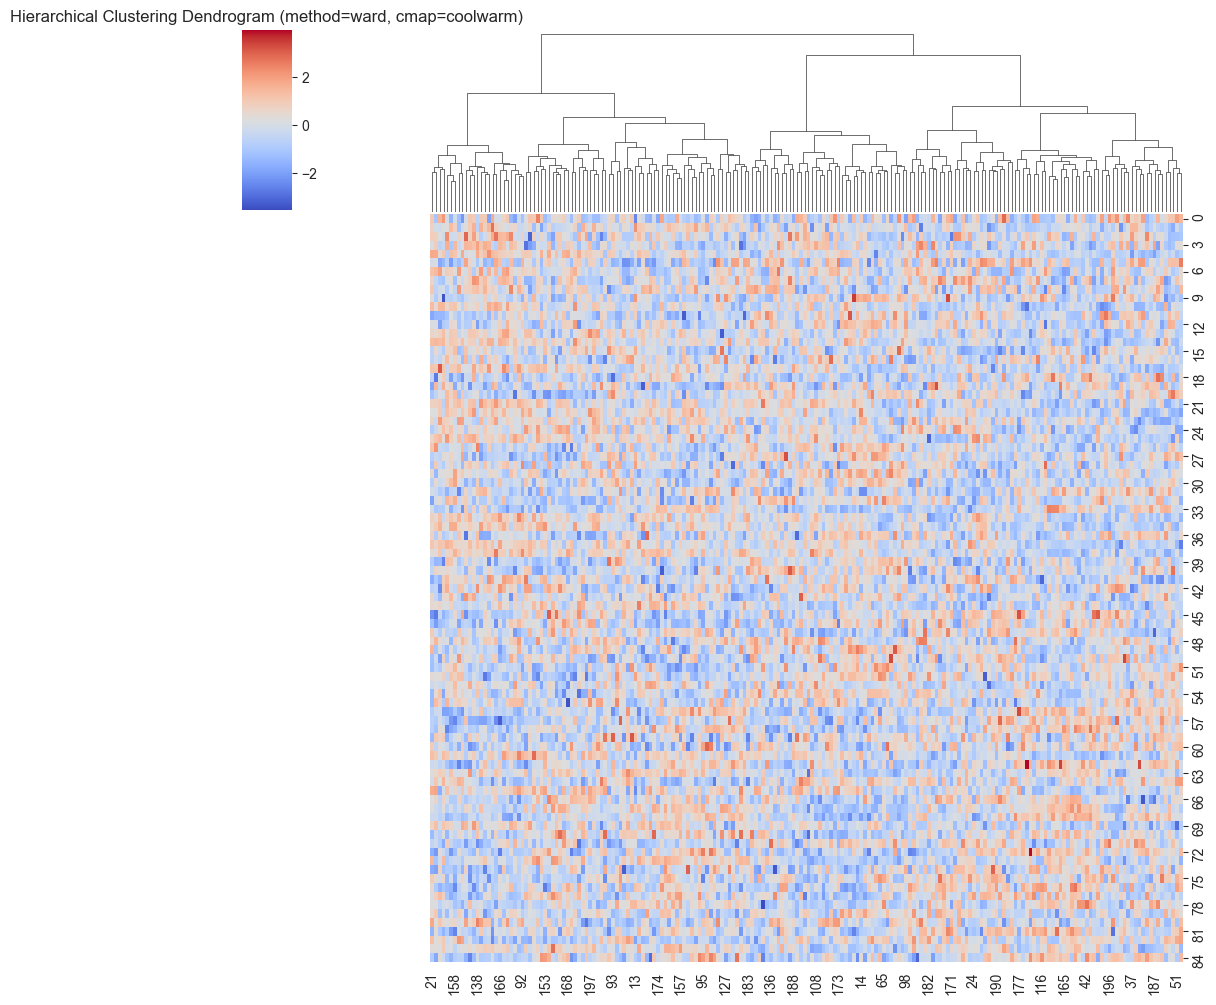

/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



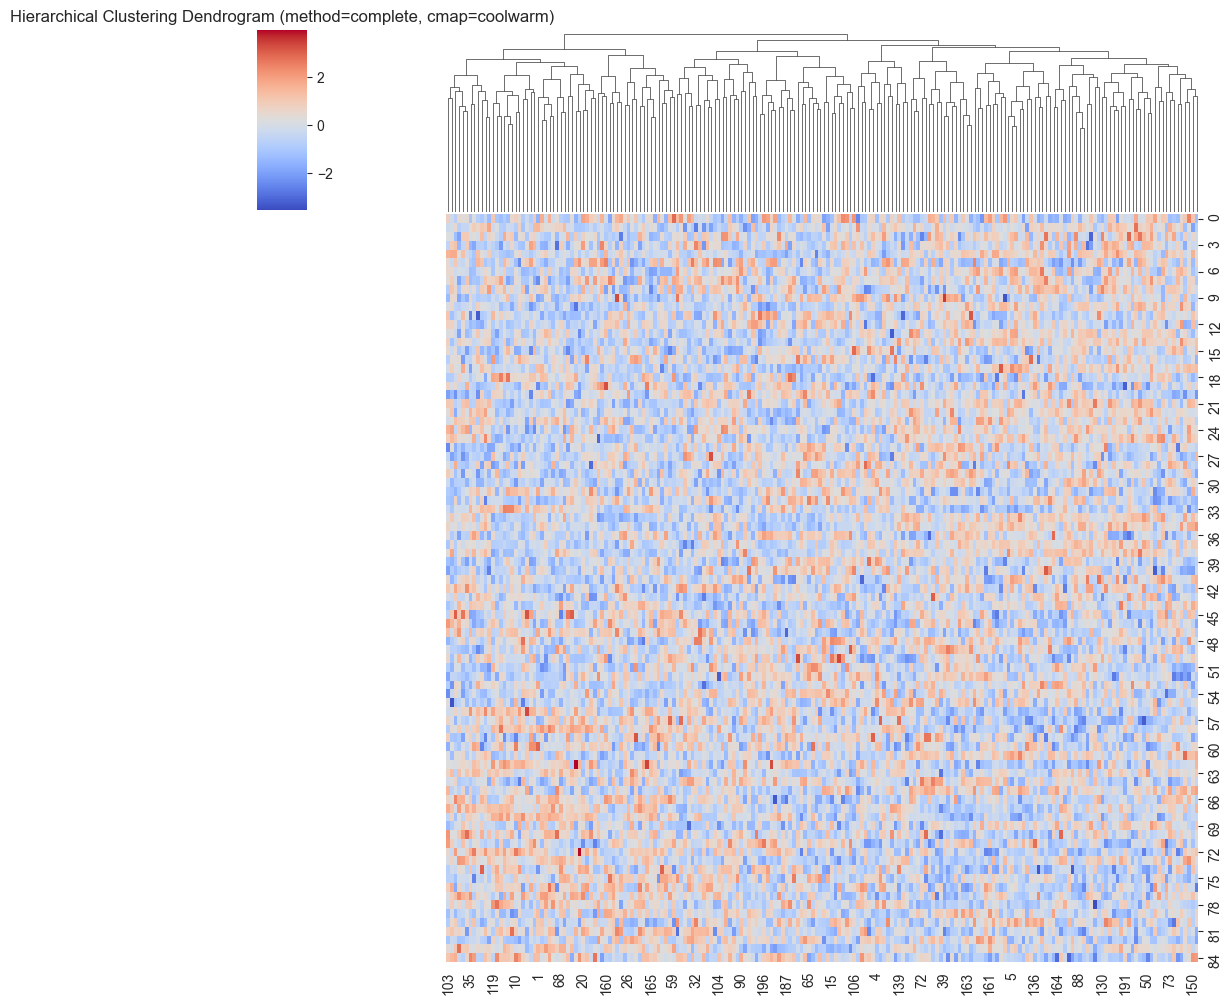

/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



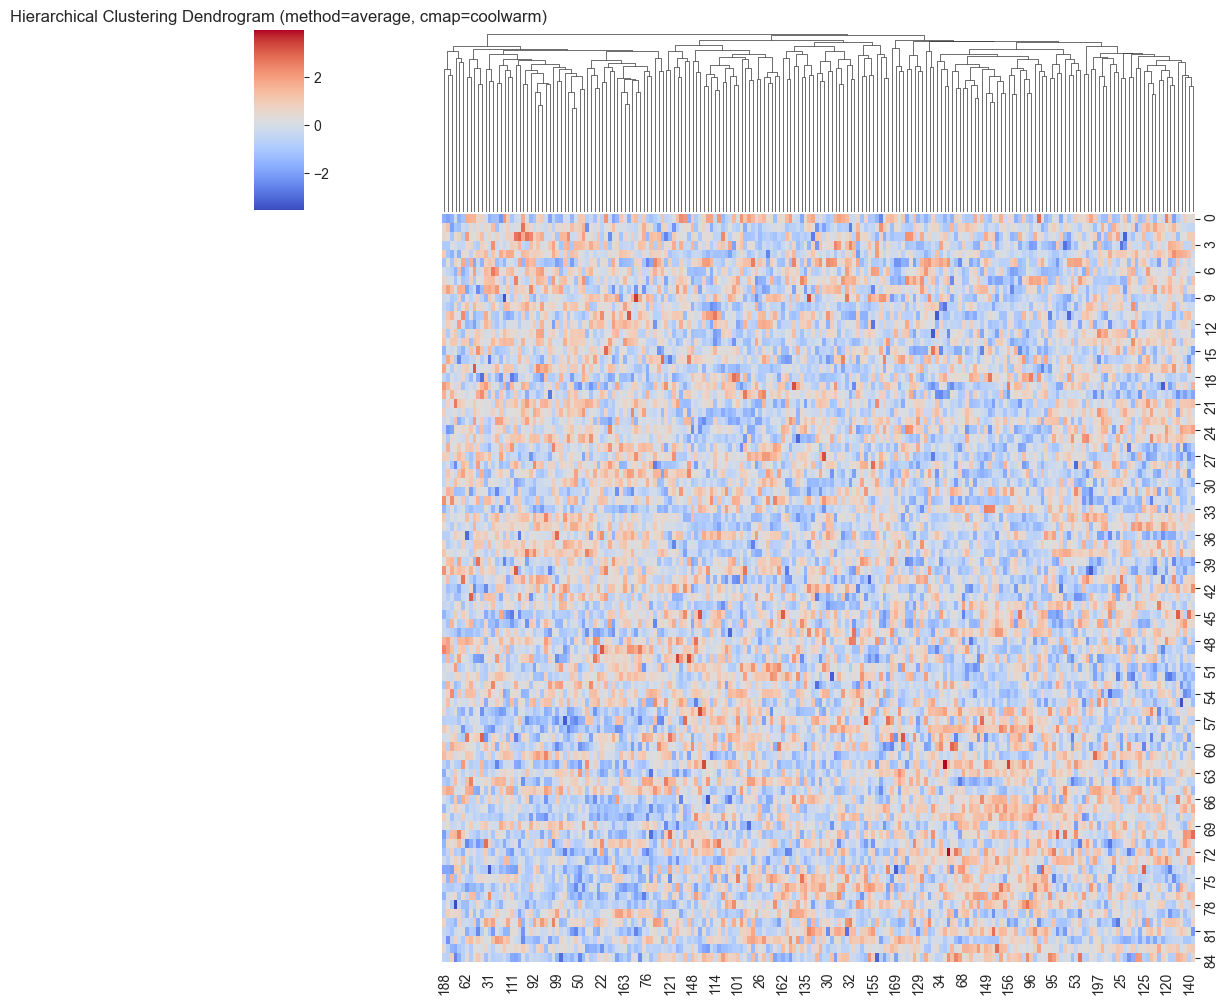

/Users/nikitasavvin/Desktop/Учеба/work_cases/venv/lib/python3.11/site-packages/seaborn/matrix.py:560: UserWarning:

Clustering large matrix with scipy. Installing `fastcluster` may give better performance.



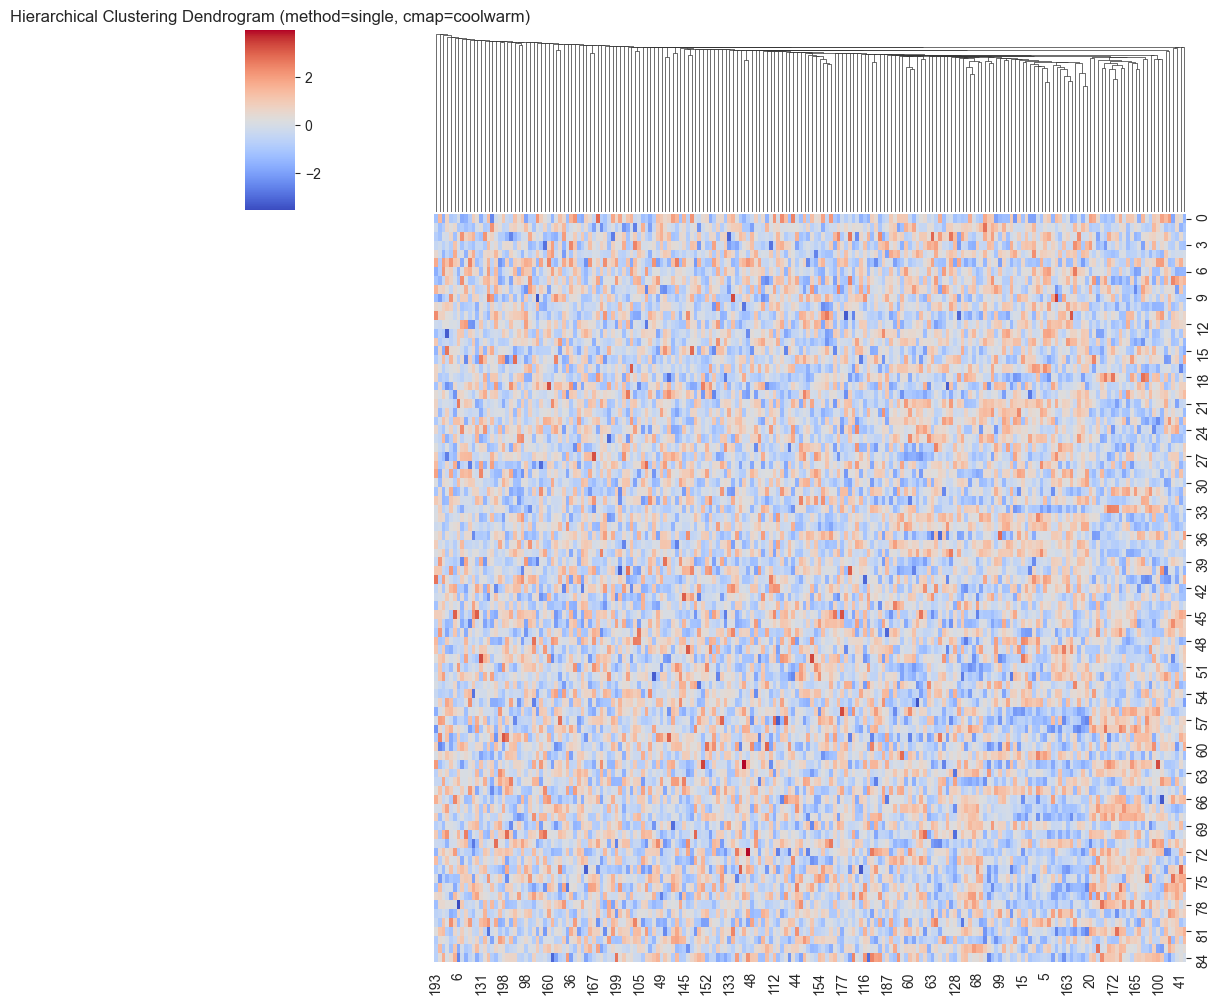

In [14]:
df = perform_agglomerative_clustering_dendrogram(df=df, n_clusters = 10)